# Importamos librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Cargamos el dataset

Dataset: [Boston Housing](https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data)

1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centres
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per $10,000 [$/10k]
11. PTRATIO: pupil-teacher ratio by town
12. B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT: % lower status of the population

Output variable:
1. MEDV: Median value of owner-occupied homes in $1000's [k$]

In [2]:
df = pd.read_csv('/content/boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df.isnull().sum().sum()

0

Análisis de Correlación

In [4]:
cols = ["DIS", "INDUS", "CRIM", "RM", "MEDV"]
cols

['DIS', 'INDUS', 'CRIM', 'RM', 'MEDV']

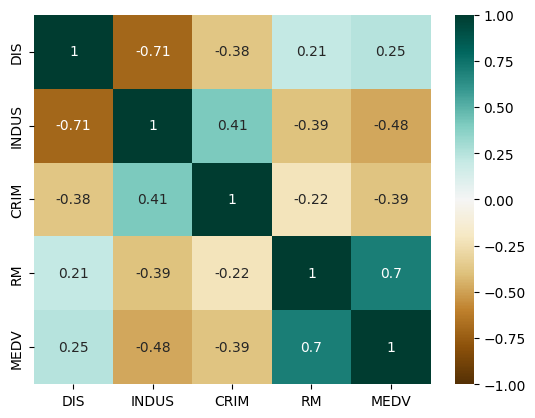

In [5]:
sns.heatmap(
    data=df[cols].corr(),
    cmap="BrBG",
    vmin=-1,
    vmax=1,
    annot=True
)
plt.show()

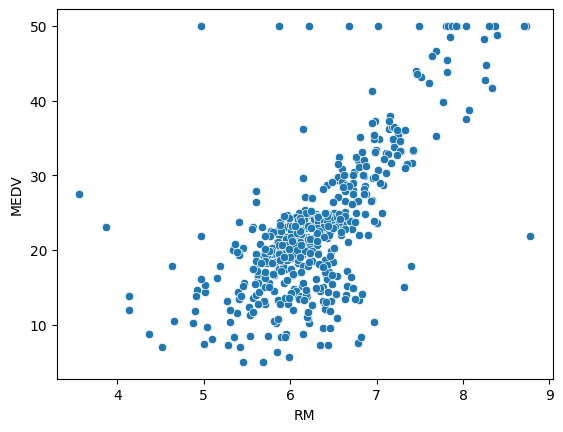

In [6]:
sns.scatterplot(data=df, x=df.RM, y=df.MEDV)
plt.show()

# Creando el modelo de regresión

## Estandarización de datos

In [26]:
X = df["RM"].values.reshape(-1,1)
y = df["MEDV"].values.reshape(-1,1)

print(X[:10])
print(y[:10])

[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]
 [6.43 ]
 [6.012]
 [6.172]
 [5.631]
 [6.004]]
[[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]
 [28.7]
 [22.9]
 [27.1]
 [16.5]
 [18.9]]


In [43]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()

X_std = scaler_x.fit_transform(X)
y_std = scaler_y.fit_transform(y)

print(X_std[:10])
print(y_std[:10])

[[ 0.41367189]
 [ 0.19427445]
 [ 1.28271368]
 [ 1.01630251]
 [ 1.22857665]
 [ 0.20709638]
 [-0.38841095]
 [-0.16046556]
 [-0.9312059 ]
 [-0.39980821]]
[[ 0.15968566]
 [-0.10152429]
 [ 1.32424667]
 [ 1.18275795]
 [ 1.48750288]
 [ 0.6712218 ]
 [ 0.03996443]
 [ 0.49708184]
 [-0.65659542]
 [-0.39538548]]


# Creamos el modelo

In [44]:
slr = LinearRegression()
slr.fit(X_std, y_std)
slr.predict(X_std)[:10]

array([[ 0.28765086],
       [ 0.13509067],
       [ 0.89194772],
       [ 0.70669606],
       [ 0.854303  ],
       [ 0.14400653],
       [-0.27008541],
       [-0.11158132],
       [-0.64752329],
       [-0.27801062]])

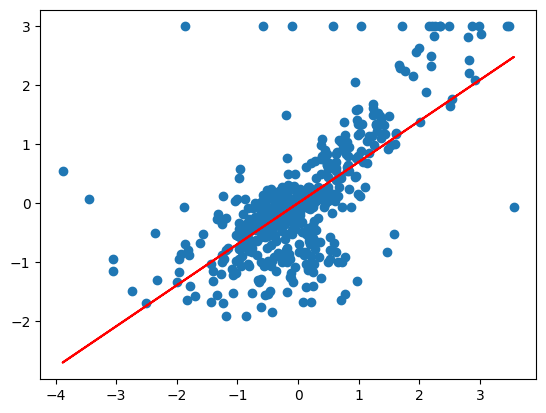

In [45]:
plt.scatter(X_std, y_std)
plt.plot(X_std, slr.predict(X_std), color="r")
plt.show()

In [46]:
from sklearn.metrics import mean_squared_error
y_pred = slr.predict(X_std)
mse = mean_squared_error(y_std, y_pred)
rmse = mse ** 0.5
rmse

0.7186616338783266

In [47]:
num_habitaciones = 7
num_habitaciones_std = scaler_x.transform(np.array([num_habitaciones]).reshape(-1,1))
print("El precio de un dpt con 7 habitaciones es de: ", scaler_y.inverse_transform(slr.predict(num_habitaciones_std)))

El precio de un dpt con 7 habitaciones es de:  [[29.04414209]]
